# Human Activity Recognition using Smartphone Data with Machine Learning

Akıllı telefon sensör verilerini kullanarak (ivmeölçer ve jiroskop) insan aktivitelerini (yürüme, merdiven çıkma, oturma vb.) makine öğrenimi ile sınıflandırmak. Temel hedef, verileri işleyip en yüksek doğrulukla aktiviteleri tahmin eden bir model oluşturmaktır.

[GİTHUB LİNKİ ](https://github.com/FBetulS/human-activity-recognition/blob/main/README.md/#google_vignette)

[Hugging Face - Human Activity Recognition](https://huggingface.co/spaces/btulftma/human-activity-recognition)

## Gerekli kütüphaneler

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

## Veri setlerini yükleme

In [6]:
train = pd.read_csv("train-1.csv")
test = pd.read_csv("test.csv")

In [7]:
train['Data'] = 'Train'
test['Data'] = 'Test'
both = pd.concat([train, test], axis=0).reset_index(drop=True)

In [8]:
both.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING,Train


# Veri Sözlüğü

| Değişken Adı                                       | Açıklama                                                          |
|----------------------------------------------------|-------------------------------------------------------------------|
| `tBodyAcc-mean()-X`                               | X eksenindeki vücut ivmeölçerinin ortalama değeri                |
| `tBodyAcc-mean()-Y`                               | Y eksenindeki vücut ivmeölçerinin ortalama değeri                |
| `tBodyAcc-mean()-Z`                               | Z eksenindeki vücut ivmeölçerinin ortalama değeri                |
| `tBodyAcc-std()-X`                                | X eksenindeki vücut ivmeölçerinin standart sapması               |
| `tBodyAcc-std()-Y`                                | Y eksenindeki vücut ivmeölçerinin standart sapması               |
| `tBodyAcc-std()-Z`                                | Z eksenindeki vücut ivmeölçerinin standart sapması               |
| `tBodyAcc-mad()-X`                                | X eksenindeki vücut ivmeölçerinin ortalama mutlak sapması       |
| `tBodyAcc-mad()-Y`                                | Y eksenindeki vücut ivmeölçerinin ortalama mutlak sapması       |
| `tBodyAcc-mad()-Z`                                | Z eksenindeki vücut ivmeölçerinin ortalama mutlak sapması       |
| `tBodyAcc-max()-X`                                | X eksenindeki vücut ivmeölçerinin maksimum değeri                |
| `angle(tBodyAccMean,gravity)`                     | Vücut ivmeölçerinin yerçekimiyle yaptığı açı                     |
| `angle(tBodyAccJerkMean,gravityMean)`             | Vücut ivmeölçerinin jerk ile yerçekimiyle yaptığı açı            |
| `angle(tBodyGyroMean,gravityMean)`                | Jiroskopun yerçekimiyle yaptığı açı                               |
| `angle(tBodyGyroJerkMean,gravityMean)`            | Jiroskopun jerk ile yerçekimiyle yaptığı açı                     |
| `angle(X,gravityMean)`                             | X ekseninin yerçekimiyle yaptığı açı                              |
| `angle(Y,gravityMean)`                             | Y ekseninin yerçekimiyle yaptığı açı                              |
| `angle(Z,gravityMean)`                             | Z ekseninin yerçekimiyle yaptığı açı                              |
| `subject`                                         | Katılımcı numarası (örneğin, #1, #2, vb.)                        |
| `Activity`                                        | Gerçekleşen aktivite (örneğin, Yürüyüş, Merdiven Çıkma, vb.)    |
| `Data`                                            | Veri setinin hangi bölümünde (Train/Test) olduğu                 |

In [10]:
both.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Data                    0
Length: 564, dtype: int64

In [11]:
both.dtypes.value_counts()

float64    561
object       2
int64        1
Name: count, dtype: int64

In [12]:
def basic_details(df):
    b = pd.DataFrame()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(both)

,N unique value,dtype
tBodyAcc-mean()-X,10292,float64
tBodyAcc-mean()-Y,10299,float64
tBodyAcc-mean()-Z,10293,float64
tBodyAcc-std()-X,10295,float64
tBodyAcc-std()-Y,10297,float64
...,...,...
"angle(Y,gravityMean)",10299,float64
"angle(Z,gravityMean)",10299,float64
subject,30,int64
Activity,6,object


## Aktivite Dağılımının Görselleştirilmesi

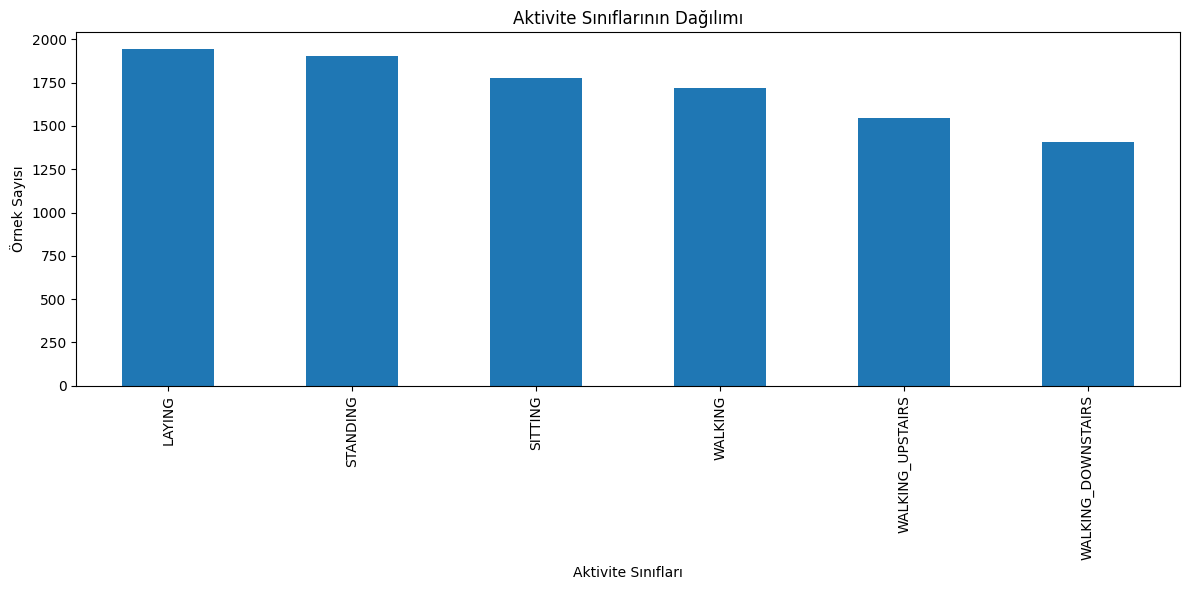

In [14]:
plt.figure(figsize=(12, 6))
both['Activity'].value_counts().plot(kind='bar')
plt.title('Aktivite Sınıflarının Dağılımı')
plt.xlabel('Aktivite Sınıfları')
plt.ylabel('Örnek Sayısı')
plt.tight_layout()
plt.show()

<BarContainer object of 6 artists>

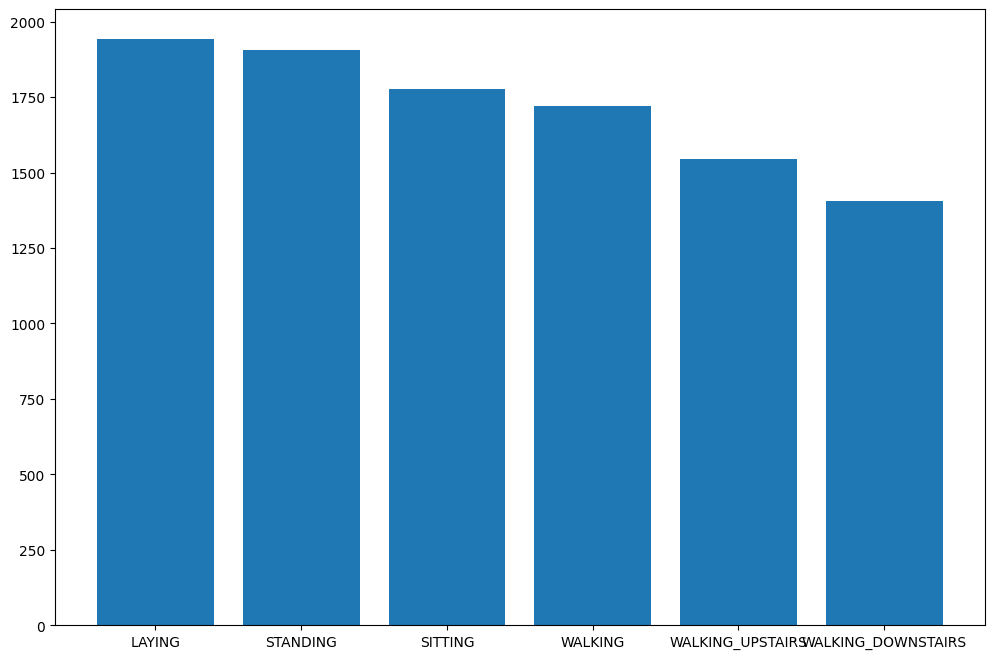

In [15]:
activity = both['Activity']
label_counts = activity.value_counts()

plt.figure(figsize= (12, 8))
plt.bar(label_counts.index, label_counts)

## Veri Ön İşleme

In [17]:
X = both.drop(['Data', 'subject', 'Activity'], axis=1)
y = both['Activity']

## Veriyi Ölçeklendirme
Özelliklerin farklı ölçeklerde olması model performansını düşürebilir. Standardizasyon ile ortalaması 0, standart sapması 1 olacak şekilde dönüştürülür

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Boyut İndirgeme
561 özelliği 0.9 varyans koruyarak daha az boyuta indirgemek (örneğin ~100

In [21]:
pca = PCA(n_components=0.9, random_state=42)
X_reduced = pca.fit_transform(X_scaled)

PCA Açıklanan Varyans Görselleştirmesi

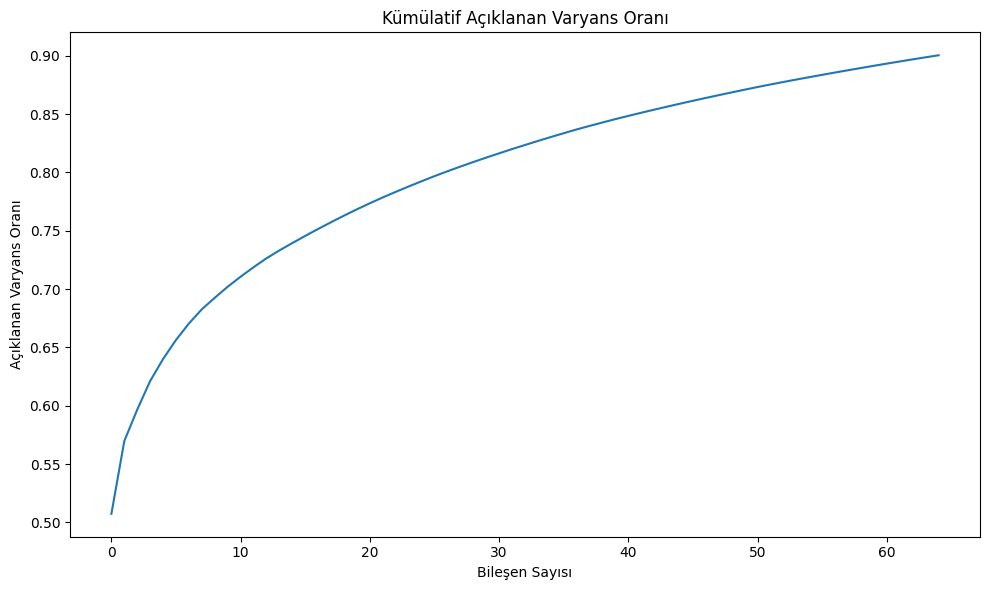

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Kümülatif Açıklanan Varyans Oranı')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('Açıklanan Varyans Oranı')
plt.tight_layout()
plt.show()

## Model Oluşturma
### Random Forest Modelini Eğitme

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [26]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred = rf_model.predict(X_test)

In [33]:
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

Sınıflandırma Raporu:
                    precision    recall  f1-score   support

            LAYING       0.98      1.00      0.99       406
           SITTING       0.90      0.83      0.86       377
          STANDING       0.85      0.90      0.87       354
           WALKING       0.96      0.96      0.96       369
WALKING_DOWNSTAIRS       0.95      0.94      0.95       284
  WALKING_UPSTAIRS       0.96      0.96      0.96       270

          accuracy                           0.93      2060
         macro avg       0.93      0.93      0.93      2060
      weighted avg       0.93      0.93      0.93      2060



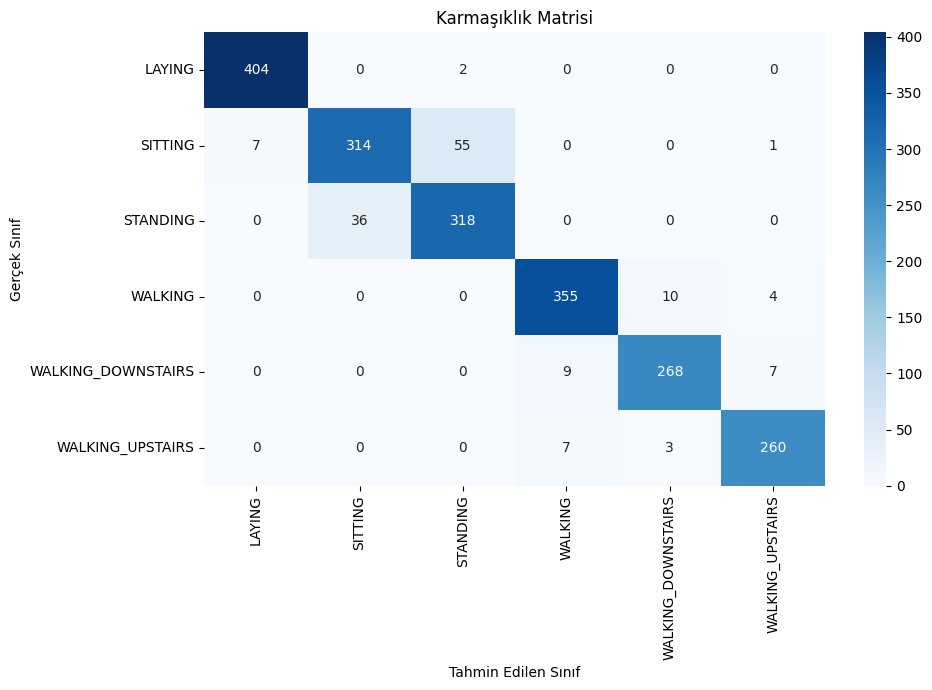

In [30]:
# Karmaşıklık Matrisi Görselleştirmesi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y.unique()), 
            yticklabels=sorted(y.unique()))
plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.tight_layout()
plt.show()

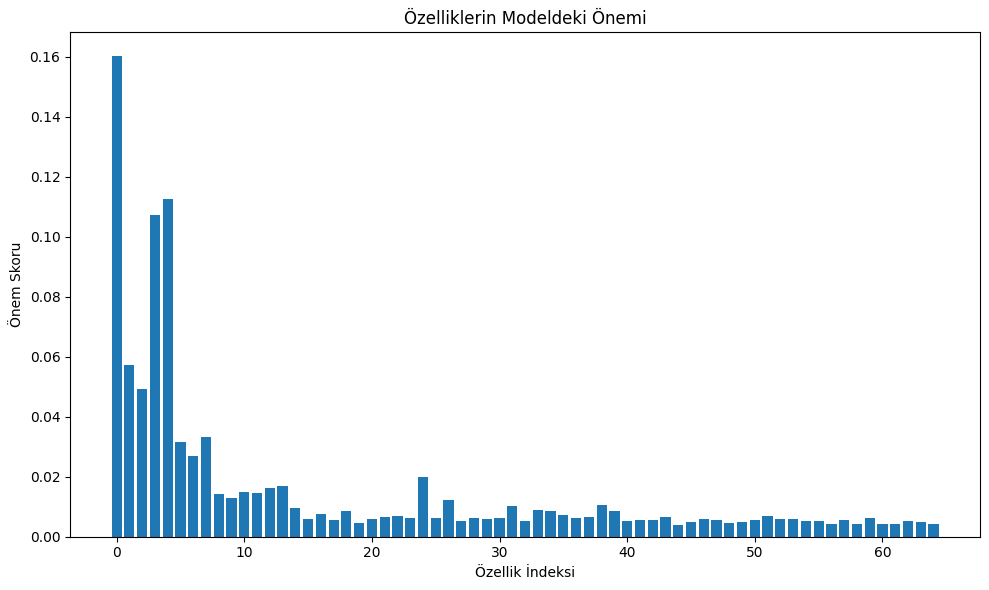

In [31]:
# Özellik Önemi Görselleştirmesi
plt.figure(figsize=(10, 6))
plt.bar(range(len(rf_model.feature_importances_)), rf_model.feature_importances_)
plt.title('Özelliklerin Modeldeki Önemi')
plt.xlabel('Özellik İndeksi')
plt.ylabel('Önem Skoru')
plt.tight_layout()
plt.show()

In [35]:
# Modeli ve Bileşenlerini Kaydetme
joblib.dump({
    'model': rf_model,
    'scaler': scaler,
    'pca': pca
}, 'human_activity_model.joblib')

print("Model başarıyla kaydedildi!")

Model başarıyla kaydedildi!


## Sonuç

Bu çalışmada, insan aktivitelerini sınıflandırmak için bir makine öğrenimi modeli geliştirilmiştir. İlk olarak, veriler yüklenmiş ve eğitim ile test setleri birleştirilmiştir. Aktivite sınıflarının dağılımı görselleştirilerek veri setinin anlayışına katkı sağlanmıştır. Veri ön işleme adımında, özellikler ölçeklendirilmiş ve boyut indirgeme için PCA (Principal Component Analysis) uygulanmıştır. PCA ile açıklanan varyans oranı görselleştirilmiş, böylece modelin en az bilgi kaybıyla daha az bileşenle çalışabileceği belirlenmiştir.

Veri, eğitim ve test setlerine ayrıldıktan sonra, Random Forest sınıflandırma modeli eğitilmiştir. Modelin başarısı, sınıflandırma raporu ve karmaşıklık matrisi ile değerlendirilmiştir. Özelliklerin modeldeki önemi de görselleştirilerek, hangi özelliklerin sınıflandırmada daha etkili olduğu ortaya konmuştur. Son olarak, model ve bileşenleri depolanarak, gelecekteki tahminler için kullanılmak üzere hazırlanmıştır. Genel olarak, model yüksek bir doğruluk oranıyla insan aktivitelerini sınıflandırmakta başarılı olmuştur.